In [12]:
import tensorflow as tf


## Defiine params and lib

In [13]:
# !git clone https://github.com/rivaelsagala/project-PM-kel-05.git

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)
validation_datagen = ImageDataGenerator(rescale = 1.0/255,validation_split=0.4)

In [16]:
train_generator = train_datagen.flow_from_directory(
    'project-PM-kel-05/dataset/train/',
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
validation_generator = validation_datagen.flow_from_directory(
        'project-PM-kel-05/dataset/valid/',
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 2143 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax'),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=1)

model.compile(loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [28]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction])

Epoch 1/3
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 519ms/step - accuracy: 0.9113 - loss: 0.2404 - val_accuracy: 0.7313 - val_loss: 4.8347 - learning_rate: 0.0010
Epoch 2/3
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 551ms/step - accuracy: 0.9500 - loss: 0.1406 - val_accuracy: 0.7164 - val_loss: 5.0590 - learning_rate: 0.0010
Epoch 3/3
67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 565ms/step - accuracy: 0.9595 - loss: 0.1219 - val_accuracy: 0.7239 - val_loss: 5.5535 - learning_rate: 0.0010


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

In [41]:
def predict_image(img_upload, model = model):
  img = img_upload
  img_array = np.asarray(img)
  img_array = img_array*(1/225)
  img_input = tf.reshape(img_array, shape = [1, 100, 150, 3])
  Probability = sorted(model.predict(img_input)[0])[2]
  predict_class = np.argmax(model.predict(img_input))

  if predict_class == 0:
            label = 'mujahir'
  elif predict_class == 1:
            label = 'red_devil'
  elif predict_class == 2:
            label = 'sepat'

  else:
            label = 'Tidak di ketahui'

  plt.show()
  print(label)
  print("Probability: ", round(Probability*100,2), "%")
  print('\n')

Saving 14266-ilustrasi-ikan-lele-unsplashwill-turner.jpg to 14266-ilustrasi-ikan-lele-unsplashwill-turner.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


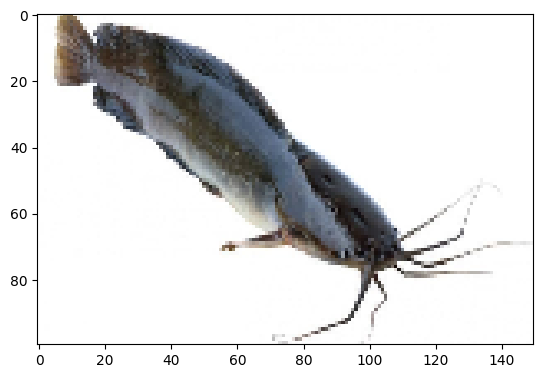

mujahir
Probability:  94.99 %




In [50]:
from tensorflow.keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

In [20]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np
import tensorflow as tf

In [21]:
# Parameters
input_size = (224,224)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['mujahir', 'red_devil', 'sepat']

In [22]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [23]:
from tensorflow.keras.models import load_model

In [24]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout  # Modify if you have a specific implementation for FixedDropout

# Define or import the custom swish activation function and FixedDropout layer here if needed
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

class FixedDropout(Dropout):
    # Assuming FixedDropout extends Dropout and has custom behavior, define it here
    pass

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

# Parameters
input_size = (224,224)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['mujahir', 'red_devil', 'sepat']

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

MODEL_PATH = 'model/fish_project/model.keras'
try:
    model = load_model(MODEL_PATH, compile=False, custom_objects={'swish': swish, 'FixedDropout': FixedDropout})
    print("Model loaded successfully.")
    # Proceed with predictions here if loading succeeds
except Exception as e:
    print("Error loading the model:",e)

Error loading the model: File not found: filepath=model/fish_project/model.keras. Please ensure the file is an accessible `.keras` zip file.


In [25]:
MODEL_PATH = 'model/fish_project/model.keras'
# print(MODEL_PATH)
# model = load_model(MODEL_PATH,compile=False)

In [26]:
# read image
im = Image.open('dataset/test/sepat/Sepat-37_png.rf.1713aff88f8f62d6910b073cd5ebd07e.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/test/sepat/Sepat-37_png.rf.1713aff88f8f62d6910b073cd5ebd07e.jpg'

In [ ]:
# read image
im = Image.open('dataset/test/mujahir/Mujahir-171_jpg.rf.78abf75d3b411e183bd6158ab3f11d06.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )


In [ ]:
# read image
im = Image.open('new_data/red_devil.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

In [ ]:
# read image
im = Image.open('dataset/test/red_devil/Red-Devil-240_jpg.rf.e1319a11c224dd53ae7d4db6627c6f8a.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )


In [ ]:
# read image
im = Image.open('new_data/devil.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

In [ ]:
# read image
im = Image.open('new_data/ikan-mujair1.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

In [ ]:
# read image
im = Image.open('dataset/train/red_devil/Red-Devil-244_jpg.rf.111b18c7ae003de0f6e485fb57e8496c.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )


In [ ]:
# read image
im = Image.open('dataset/train/red_devil/Red-Devil-59_png.rf.b0a43e7e7204a6cf3dfa86f50d755d42.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )
